In [20]:
import sys
sys.path.append('/home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/OEM-Few-Shot-Learnable-Prompt/Painter/SegGPT/SegGPT_inference')

In [21]:
import os
import argparse

import torch
import numpy as np

from seggpt_engine import inference_image, inference_video
import models_seggpt

In [22]:
imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])


ckpt_path = '/home/eric/data/weight/seggpt_vit_large.pth'
input_image = '/home/eric/data/Military/patch_8.png'
prompt_image = '/home/eric/data/Military/final_image_with_rotated_patches.png'
prompt_target =  '/home/eric/data/Military/final_mask.png'
output_dir = '/home/eric/data/seggpt_outputs'


from types import SimpleNamespace
def get_args_parser(args=None):
    parser = argparse.ArgumentParser('SegGPT inference', add_help=False)
    parser.add_argument('--ckpt_path', type=str, help='path to ckpt',
                        default=f'{ckpt_path}')
    parser.add_argument('--model', type=str, help='dir to ckpt',
                        default='seggpt_vit_large_patch16_input896x448')
    parser.add_argument('--input_image', type=str, help='path to input image to be tested',
                        default=f'{input_image}')
    parser.add_argument('--input_video', type=str, help='path to input video to be tested',
                        default=None)
    parser.add_argument('--num_frames', type=int, help='number of prompt frames in video',
                        default=0)
    parser.add_argument('--prompt_image', type=str, nargs='+', help='path to prompt image',
                        default=f'{prompt_image}')
    parser.add_argument('--prompt_target', type=str, nargs='+', help='path to prompt target',
                        default=f'{prompt_target}')
    parser.add_argument('--seg_type', type=str, help='embedding for segmentation types', 
                        choices=['instance', 'semantic'], default='instance')
    parser.add_argument('--device', type=str, help='cuda or cpu',
                        default='cuda')
    parser.add_argument('--output_dir', type=str, help='path to output',
                        default=f'{output_dir}')
    return parser.parse_args([])



def prepare_model(chkpt_dir, arch='seggpt_vit_large_patch16_input896x448', seg_type='instance'):
    # build model
    model = getattr(models_seggpt, arch)()
    model.seg_type = seg_type
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')  
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    model.eval()
    return model

In [23]:
'''
python seggpt_inference.py \
--input_image examples/hmbb_3.jpg \
--prompt_image examples/hmbb_1.jpg examples/hmbb_2.jpg \
--prompt_target examples/hmbb_1_target.png examples/hmbb_2_target.png \
--output_dir ./
'''

# Example usage in Jupyter notebook:
args = get_args_parser([])

In [24]:
args.ckpt_path

'/home/eric/data/weight/seggpt_vit_large.pth'

In [25]:
args.input_image

'/home/eric/data/Military/patch_8.png'

In [26]:
args.output_dir

'/home/eric/data/seggpt_outputs'

In [27]:
device = torch.device(args.device)
model = prepare_model(args.ckpt_path, args.model, args.seg_type).to(device)
print('Model loaded.')

assert args.input_image or args.input_video and not (args.input_image and args.input_video)

if args.input_image is not None:
    assert args.prompt_image is not None and args.prompt_target is not None

    img_name = os.path.basename(args.input_image)
    out_path = os.path.join(args.output_dir, "output_" + '.'.join(img_name.split('.')[:-1]) + '.png')
    print("outpath : ", out_path)
    inference_image(model, device, args.input_image, args.prompt_image, args.prompt_target, out_path)

if args.input_video is not None:
    assert args.prompt_target is not None and len(args.prompt_target) == 1
    vid_name = os.path.basename(args.input_video)
    out_path = os.path.join(args.output_dir, "output_" + '.'.join(vid_name.split('.')[:-1]) + '.mp4')

    inference_video(model, device, args.input_video, args.num_frames, args.prompt_image, args.prompt_target, out_path)

print('Finished.')

Model loaded.
outpath :  /home/eric/data/seggpt_outputs/output_patch_8.png
filename /home/eric/data/Military/patch_8.png
filename /home/eric/data/Military/final_image_with_rotated_patches.png
filename /home/eric/data/Military/final_mask.png
Finished.


In [28]:
#----------------- 
input_image = '/home/eric/data/Military/patch_8.png'
prompt_image = '/home/eric/data/Military/final_image_with_rotated_patches.png'
prompt_target =  '/home/eric/data/Military/final_mask.png'
output_dir = '/home/eric/data/seggpt_outputs'

out_image = output_dir + "/" + "output_patch_8.png"

In [29]:
import matplotlib.pyplot as plt 
from PIL import Image

input_image = Image.open(input_image)
prompt_image = Image.open(prompt_image)
prompt_target = Image.open(prompt_target)
out_image = Image.open(out_image)


filename /home/eric/data/Military/patch_8.png
filename /home/eric/data/Military/final_image_with_rotated_patches.png
filename /home/eric/data/Military/final_mask.png
filename /home/eric/data/seggpt_outputs/output_patch_8.png


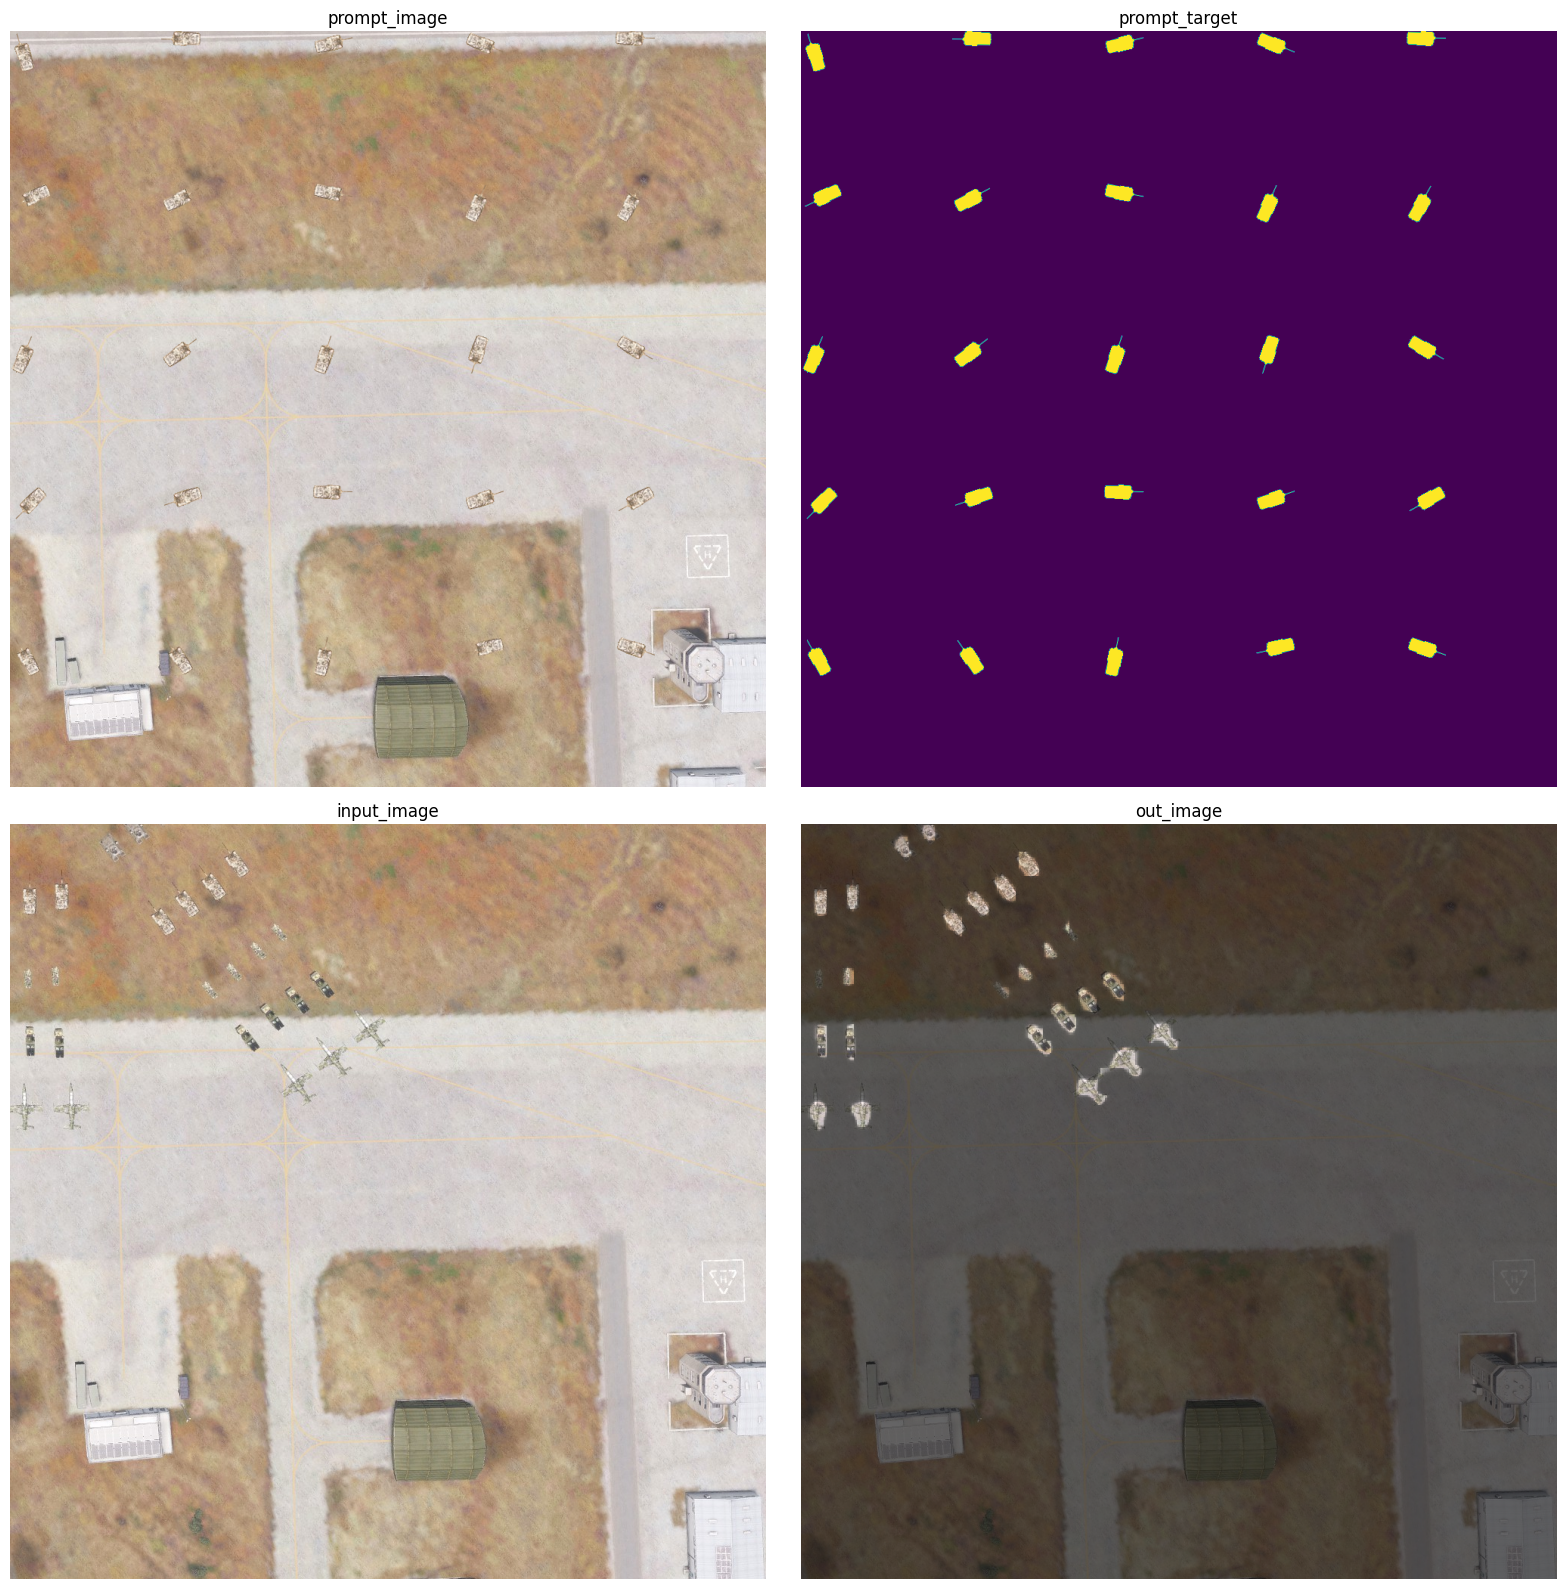

In [30]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 16))  # Adjust figsize as needed

# Display each image in its respective subplot
axs[0, 0].imshow(prompt_image)
axs[0, 0].set_title("prompt_image")
axs[0, 0].axis('off')  # Hide the axis if desired

axs[0, 1].imshow(prompt_target)
axs[0, 1].set_title("prompt_target")
axs[0, 1].axis('off')

axs[1, 0].imshow(input_image)
axs[1, 0].set_title("input_image")
axs[1, 0].axis('off')

axs[1, 1].imshow(out_image)
axs[1, 1].set_title("out_image")
axs[1, 1].axis('off')

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()